<a href="https://colab.research.google.com/github/GhazalehKeyvani/Avina/blob/main/MLCrashCourse/fa_Multi_Class_with_Classification_with_MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#طبقه بندی چند کلاسه


## اهداف یادگیری:

پس از انجام این کولب، می‌دانید که چگونه کارهای زیر را انجام دهید:

   * مسئله کلاسیک MNIST را درک کنید.
   * ایجاد یک شبکه عصبی عمیق که طبقه بندی چند کلاسه را انجام می دهد.
   * شبکه عصبی عمیق را تنظیم کنید.

این تمرین طبقه بندی تصاویر را با یادگیری ماشین معرفی می کند.


## مجموعه داده
  
این مجموعه داده MNIST شامل نمونه های زیادی است:

* مجموعه آموزشی MNIST شامل 60000 نمونه است.
* مجموعه تست MNIST شامل 10000 نمونه است.

هر مثال حاوی یک نقشه پیکسلی است که نشان می دهد شخص چگونه یک رقم را نوشته است. برای مثال، تصاویر زیر نشان می‌دهند که چگونه یک شخص رقم «1» را نوشته است و چگونه ممکن است آن رقم در یک نقشه پیکسلی 14×14 نمایش داده شود (پس از عادی‌سازی داده‌های ورودی).

![دو تصویر. تصویر اول یک رقم تا حدودی مبهم را نشان می دهد. تصویر دوم یک آرایه ممیز شناور ۱۴×۱۴ را نشان می‌دهد که در آن بیشتر سلول‌ها دارای ۰ هستند اما تعداد کمی از سلول‌ها حاوی مقادیری بین ۰.۰ و ۱.۰ هستند. الگوی مقادیر غیرصفر با تصویر رقم فازی در تصویر اول مطابقت دارد.](https://www.tensorflow.org/images/MNIST-Matrix.png)

هر نمونه در مجموعه داده MNIST شامل موارد زیر است:

* برچسبی که توسط یک [رتبه‌دهنده](https://developers.google.com/machine-learning/glossary/#rater) مشخص شده است. هر برچسب باید یک عدد صحیح از 0 تا 9 باشد. برای مثال، در تصویر قبلی، رتبه‌دهنده تقریباً به طور قطع برچسب '1' را به مثال اختصاص می‌دهد.
* یک نقشه پیکسل 28x28، که در آن هر پیکسل یک عدد صحیح بین 0 تا 255 است. مقادیر پیکسل در مقیاس خاکستری هستند که در آن 0 نشان دهنده سفید، 255 نشان دهنده سیاه و مقادیر بین 0 تا 255 نشان دهنده سایه های مختلف خاکستری است.

این یک مشکل طبقه بندی چند کلاسه است که دارای 10 کلاس خروجی است، یکی برای هر رقم.


## ماژول های مربوطه را وارد کنید

سلول کد مخفی زیر کد لازم را برای اجرای کد در بقیه قسمت های این آزمایشگاه وارد می کند.

In [ ]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

## دیتاست را بارگیری کنید

`tf.keras` مجموعه ای از توابع راحت را برای بارگیری مجموعه داده های شناخته شده ارائه می دهد. هر یک از این توابع راحتی کارهای زیر را انجام می دهد:

* هم مجموعه آموزشی و هم مجموعه تست را بارگذاری می کند.
* هر مجموعه را به ویژگی ها و برچسب ها جدا می کند.

تابع راحتی مربوطه برای MNIST ` mnist.load_data() `نامیده می شود:

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


توجه داشته باشید که `mnist.load_data()` چهار مقدار جداگانه برگرداند:

* `x_train` شامل ویژگی های مجموعه آموزشی است.
* `y_train` حاوی برچسب‌های مجموعه آموزشی است.
* `x_test` شامل ویژگی‌های مجموعه آزمایشی است.
* `y_test` حاوی برچسب‌های مجموعه آزمایشی است.

**توجه:**

 مجموعه آموزشی MNIST .csv در حال حاضر مخلوط شده است.


## مجموعه داده را مشاهده کنید

فایل csv. برای مجموعه داده مسکن کالیفرنیا حاوی نام ستون‌ها است (به عنوان مثال، `latitude`, `longitude`, `population`). در مقابل، فایل csv. برای MNIST حاوی نام ستون نیست. به جای نام ستون ها، از اعداد ترتیبی برای دسترسی به زیر مجموعه های مختلف مجموعه داده MNIST استفاده می کنید. در واقع، احتمالاً بهتر است `x_train` و `x_test` را به‌عنوان آرایه‌های NumPy دو بعدی در نظر بگیرید:

In [ ]:
# خروجی مثال شماره 2197 مجموعه آموزشی.
x_train[2197]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 213, 254,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  92, 252, 253, 131,   0,   0,   0

همچنین، می‌توانید `matplotlib.pyplot.imshow` را فراخوانی کنید تا آرایه عددی قبلی را به عنوان یک تصویر تفسیر کنید.

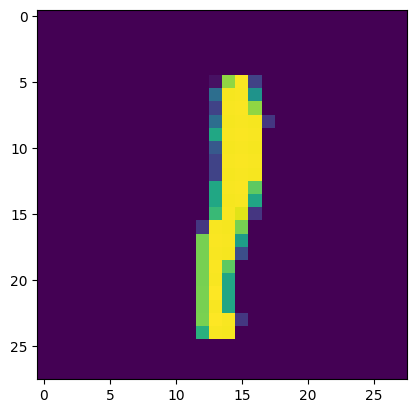

In [ ]:
# برای تجسم آرایه از رنگ های کاذب استفاده کنید.
plt.imshow(x_train[2197])

In [ ]:
# خروجی ردیف #10 از مثال #2917.
x_train[2197][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  71, 252, 253, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [ ]:
# پیکسل خروجی شماره 16 از ردیف شماره 10 مثال شماره 2197
x_train[2197][10][16]

252

##تمرین1 :نرمالسازی مقدار ویژگی ها

سلول کد زیر را تکمیل کنید تا مقدار هر ویژگی از نمایش فعلی آن (یک عدد صحیح بین 0 تا 255) به یک مقدار ممیز شناور بین 0 و 1.0 نگاشت شود. مقادیر ممیز شناور را در `x_train_normalized` و `x_train_normalized` ذخیره کنید.

In [ ]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2197][10])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.27843137 0.98823529 0.99215686 0.98823529 0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


##معرفی تابع رسم نمودار

In [ ]:
#@title تابع رسم را تعریف کنید
def plot_curve (epochs, hist, list_of_metrics):
   """منحنی از یک یا چند معیار طبقه بندی در مقابل دوره را ترسیم کنید."""
   # فهرست_متریک‌ها باید یکی از نام‌هایی باشد که در:
   # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

   plt.figure()
   plt.xlabel ("epoch")
   plt.ylabel ("value")

   for m in list_of_metrics:
     x = hist[m]
     plt.plot(epochs[1:], x[1:], label=m)

   plt.legend()

print("Loaded the plot_curve function")

Loaded the plot_curve function


##ایجاد مدل شبکه عصبی عمیق
## یک مدل شبکه عصبی عمیق ایجاد کنید

تابع "create_model" توپوگرافی شبکه عصبی عمیق را تعریف می کند و موارد زیر را مشخص می کند:

* تعداد [لایه ها](https://developers.google.com/machine-learning/glossary/#layer) در شبکه عصبی عمیق.
* تعداد [node](https://developers.google.com/machine-learning/glossary/#node) در هر لایه.
* هر لایه [regularization](https://developers.google.com/machine-learning/glossary/#regularization).

تابع create_model همچنین [عملکرد فعال‌سازی](https://developers.google.com/machine-learning/glossary/#activation_function) هر لایه را تعریف می‌کند. تابع فعال‌سازی لایه خروجی [softmax](https://developers.google.com/machine-learning/glossary/#softmax) است، که برای هر مثال 10 خروجی مختلف به دست می‌دهد. هر یک از 10 خروجی این احتمال را فراهم می کند که مثال ورودی یک رقم معین باشد.

**توجه:**

 برخلاف چندین Colab های اخیر، این تمرین ستون های ویژگی یا لایه ویژگی را تعریف نمی کند. در عوض، مدل بر روی آرایه NumPy آموزش خواهد دید.

In [ ]:
def create_model(my_learning_rate):
   """یک شبکه عصبی عمیق ایجاد و کامپایل کنید."""

   # تمامی مدل های این دوره به صورت ترتیبی هستند.
   model = tf.keras.models.Sequential()

   # ویژگی ها در یک آرایه دو بعدی 28X28 ذخیره می شوند.
   # آن آرایه دو بعدی را به صورت یک بعدی صاف کنید
   # آرایه 784 عنصری.
   model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

   # اولین لایه مخفی را تعریف کنید.
   model.add(tf.keras.layers.Dense(units=256, activation='relu'))

   # یک لایه تنظیم حذفی را تعریف کنید.
   model.add(tf.keras.layers.Dropout(rate=0.2))


   # لایه خروجی را تعریف کنید. پارامتر واحدها روی 10 تنظیم شده است زیرا
   # مدل باید از بین 10 مقدار خروجی ممکن (نماینده
   # ارقام از 0 تا 9، شامل).
   #
   # این لایه را تغییر ندهید.
   model.add(tf.keras.layers.Dense(units=128, activation='softmax'))

   # لایه ها را در مدلی بسازید که TensorFlow بتواند آن را اجرا کند.
   # توجه کنید که تابع ضرر برای طبقه بندی چند کلاسه
   # متفاوت از تابع ضرر برای طبقه بندی باینری است.
   model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

   return model


def train_model(model, train_features, train_label, epochs,
                 batch_size=None, validation_split=0.1):
   """آموزش مدل با تغذیه داده ها."""

   history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                       epochs=epochs, shuffle=True,
                       validation_split=validation_split)

   # برای پیگیری پیشرفت تمرین، یک عکس فوری جمع آوری کنید
   # از معیارهای مدل در هر دوره.
   epochs = history.epoch
   hist = pd.DataFrame(history.history)

   return epochs, hist


## توابع قبلی را فراخوانی کنید

سلول کد زیر را اجرا کنید تا توابع قبلی را فراخوانی کنید و در واقع مدل را در مجموعه آموزشی آموزش دهید.

**توجه:**

 به دلیل چندین عامل (به عنوان مثال، نمونه های بیشتر و شبکه عصبی پیچیده تر)، آموزش MNIST ممکن است بیشتر از آموزش مجموعه داده مسکن کالیفرنیا طول بکشد.

Epoch 1/50
12/12 [==============================] - 3s 188ms/step - loss: 1.8968 - accuracy: 0.5714 - val_loss: 0.5252 - val_accuracy: 0.8505
Epoch 2/50
12/12 [==============================] - 2s 201ms/step - loss: 0.5326 - accuracy: 0.8330 - val_loss: 0.3456 - val_accuracy: 0.8996
Epoch 3/50
12/12 [==============================] - 2s 145ms/step - loss: 0.3951 - accuracy: 0.8832 - val_loss: 0.2894 - val_accuracy: 0.9174
Epoch 4/50
12/12 [==============================] - 1s 121ms/step - loss: 0.3273 - accuracy: 0.9028 - val_loss: 0.2534 - val_accuracy: 0.9286
Epoch 5/50
12/12 [==============================] - 1s 114ms/step - loss: 0.2833 - accuracy: 0.9187 - val_loss: 0.2277 - val_accuracy: 0.9377
Epoch 6/50
12/12 [==============================] - 1s 113ms/step - loss: 0.2538 - accuracy: 0.9277 - val_loss: 0.2083 - val_accuracy: 0.9417
Epoch 7/50
12/12 [==============================] - 1s 116ms/step - loss: 0.2281 - accuracy: 0.9344 - val_loss: 0.1920 - val_accuracy: 0.9459
Epoch 

[0.07232123613357544, 0.9779999852180481]

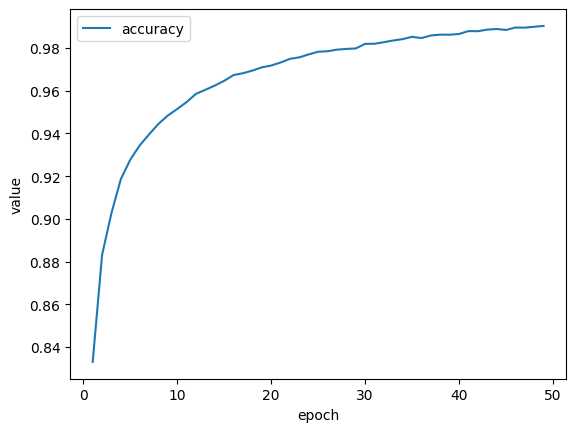

In [ ]:
# متغیرهای زیر ابرپارامترها هستند.
learning_rate = 0.003
epochs = 50
batch_size = 4000

validation_split = 0.2

# توپوگرافی مدل را تعیین کنید.
my_model = create_model(learning_rate)

# مدل را روی مجموعه آموزشی نرمال شده آموزش دهید.
epochs, hist = train_model(my_model, x_train_normalized, y_train,
                             epochs, batch_size, validation_split)


# نموداری از متریک در مقابل دوره ها ترسیم کنید.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# در مقابل مجموعه آزمون ارزیابی کنید.
print("\n مدل جدید را در برابر مجموعه آزمایشی ارزیابی کنید:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

##تمرین 2: مدل را بهینه کنید

با موارد زیر آزمایش کنید:

* تعداد لایه های پنهان
* تعداد گره ها در هر لایه
* نرخ منظم regularization

چه روندهایی را کشف کردید؟ آیا می توانید در برابر مجموعه تست به حداقل 98 درصد دقت برسید؟

In [ ]:
#@title برای مشاهده برخی از پاسخ های احتمالی دوبار کلیک کنید.

# آزمایش بسیار طولانی خواهد بود
# به طور کامل با توپوگرافی و تنظیم regularization
# نرخ. در دنیای واقعی، شما این کار را خواهید کرد
# همچنین با نرخ یادگیری، اندازه دسته ای آزمایش کنید،
# و تعداد دوره ها از آنجایی که شما فقط یک
# چند دقیقه، جستجوی روندها می تواند مفید باشد.
# در اینجا چیزی است که ما کشف کردیم:
  # * اضافه کردن گره های بیشتر (حداقل تا 256 گره)
  # تا اولین لایه پنهان دقت را بهبود بخشید.
  # * به طور کلی اضافه کردن یک لایه مخفی دوم
  # دقت بهبود یافته.
  # * وقتی مدل دارای گره های زیادی باشد،
  # مدل بیش از حد برازش می‌کند مگر اینکه نرخ Dropout باشد
  # حداقل 0.5 است.

# با دقت تست به 98 درصد رسیدیم
# پیکربندی زیر:
# * یک لایه پنهان از 256 گره, بدون دوم
# لایه پنهان
# * نرخ منظم Dropout 0.4

# با دقت تست به 98.2% رسیدیم
# پیکربندی زیر:
# * اولین لایه پنهان از 256 گره.
# دومین لایه پنهان از 128 گره.
# * نرخ regularization در خروجی 0.2